In [1]:
import pandas as pd

In [13]:
burcunun_verisi = pd.read_csv("reno_clio.csv")
burcunun_verisi

,yıl,km
0,1996,220.0
1,1996,264.0
2,1996,357.0
3,1997,270.0
4,1997,267.0
...,...,...
82,2023,20.0
83,2023,42.0
84,2024,7.0
85,2024,10.0


In [10]:

%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
burcunun_verisi = pd.read_csv("reno_clio.csv")
burcunun_verisi['yas'] = 2024 - burcunun_verisi['yıl']
burcunun_verisi

,yıl,km,yas
0,1996,220.0,28
1,1996,264.0,28
2,1996,357.0,28
3,1997,270.0,27
4,1997,267.0,27
...,...,...,...
82,2023,20.0,1
83,2023,42.0,1
84,2024,7.0,0
85,2024,10.0,0


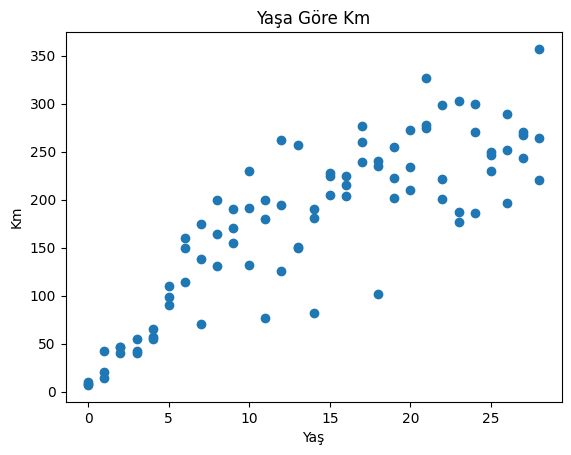

In [15]:
import matplotlib.pyplot as plt

plt.scatter(burcunun_verisi['yas'], burcunun_verisi['km'])
plt.xlabel('Yaş')
plt.ylabel('Km')
plt.title('Yaşa Göre Km')
plt.show()

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(burcunun_verisi[['yas', 'km']])
burcunun_verisi['küme'] = kmeans.predict(burcunun_verisi[['yas', 'km']])
burcunun_verisi

,yıl,km,yas,küme
0,1996,220.0,28,1
1,1996,264.0,28,3
2,1996,357.0,28,2
3,1997,270.0,27,3
4,1997,267.0,27,3
...,...,...,...,...
82,2023,20.0,1,0
83,2023,42.0,1,0
84,2024,7.0,0,0
85,2024,10.0,0,0


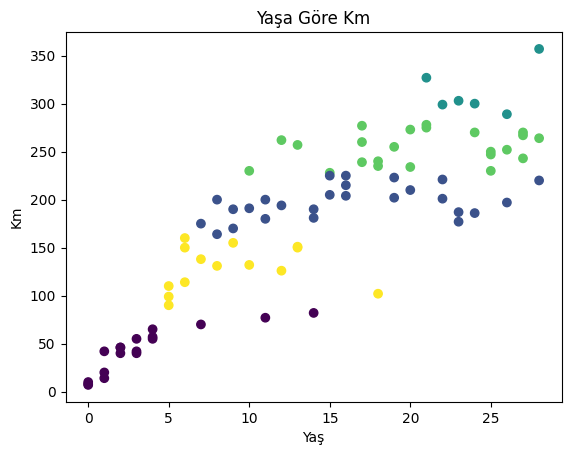

In [17]:
plt.scatter(burcunun_verisi['yas'], burcunun_verisi['km'], c=burcunun_verisi['küme'])
plt.xlabel('Yaş')
plt.ylabel('Km')
plt.title('Yaşa Göre Km')
plt.show()

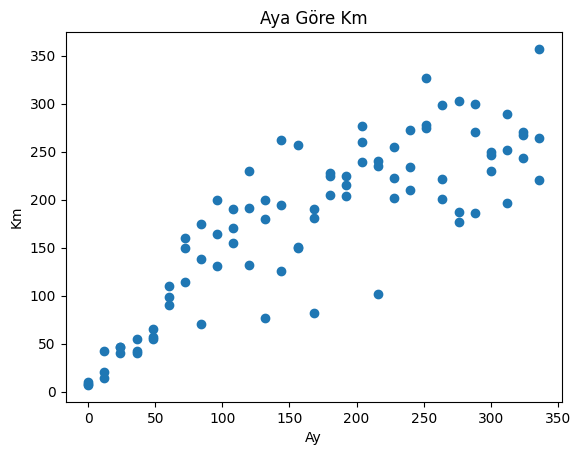

In [18]:
burcunun_verisi['yas_ay'] = burcunun_verisi['yas'] * 12

plt.scatter(burcunun_verisi['yas_ay'], burcunun_verisi['km'])
plt.xlabel('Ay')
plt.ylabel('Km')
plt.title('Aya Göre Km')
plt.show()

In [19]:
kmeans2 = KMeans(n_clusters=5)
kmeans2.fit(burcunun_verisi[['yas_ay', 'km']])
burcunun_verisi['küme2'] = kmeans2.predict(burcunun_verisi[['yas_ay', 'km']])
burcunun_verisi

,yıl,km,yas,küme,yas_ay,küme2
0,1996,220.0,28,1,336,2
1,1996,264.0,28,3,336,2
2,1996,357.0,28,2,336,2
3,1997,270.0,27,3,324,2
4,1997,267.0,27,3,324,2
...,...,...,...,...,...,...
82,2023,20.0,1,0,12,1
83,2023,42.0,1,0,12,1
84,2024,7.0,0,0,0,1
85,2024,10.0,0,0,0,1


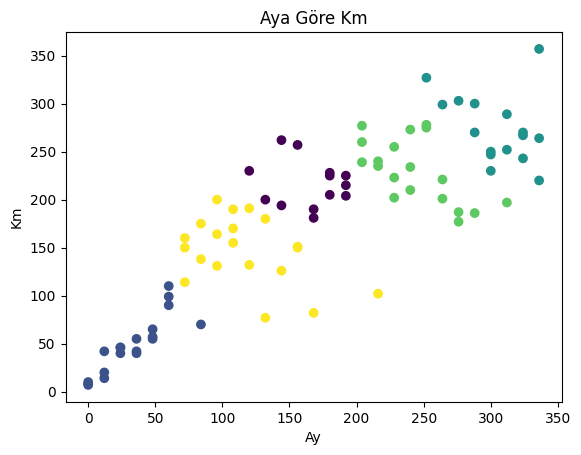

In [20]:
plt.scatter(burcunun_verisi['yas_ay'], burcunun_verisi['km'], c=burcunun_verisi['küme2'])
plt.xlabel('Ay')
plt.ylabel('Km')
plt.title('Aya Göre Km')
plt.show()

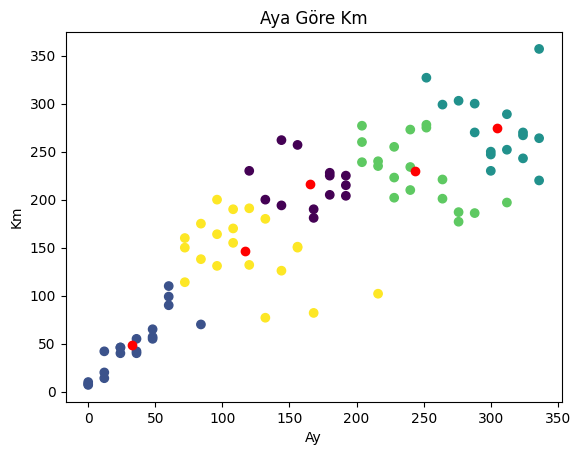

In [21]:
# draw centroids
plt.scatter(burcunun_verisi['yas_ay'], burcunun_verisi['km'], c=burcunun_verisi['küme2'])
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='red')
plt.xlabel('Ay')
plt.ylabel('Km')
plt.title('Aya Göre Km')
plt.show()

In [23]:
burcunun_verisi.to_csv('burcunun_verisi.csv', index=False)

In [12]:
# cluster number 1 is çok eski
# cluster number 2 is eski
# cluster number 3 is orta
# cluster number 4 is yeni
# cluster number 5 is çok yeni

burcunun_verisi['YeniOlmaDurumu'] = burcunun_verisi['küme2'].replace({0: 'çok eski', 1: 'eski', 2: 'orta', 3: 'yeni', 4: 'çok yeni'})
burcunun_verisi

,yıl,km,yas,küme,yas_ay,küme2,YeniOlmaDurumu
0,1996,220.0,28,1,336,2,orta
1,1996,264.0,28,1,336,2,orta
2,1996,357.0,28,4,336,2,orta
3,1997,270.0,27,1,324,2,orta
4,1997,267.0,27,1,324,2,orta
...,...,...,...,...,...,...,...
82,2023,20.0,1,0,12,0,çok eski
83,2023,42.0,1,0,12,0,çok eski
84,2024,7.0,0,0,0,0,çok eski
85,2024,10.0,0,0,0,0,çok eski


In [28]:
tugcenin_verisi = pd.read_csv ("lineer regresyon - Sayfa1.csv")
tugcenin_verisi

,ücret,asayısı
0,350.000,10.0
1,380.000,8.0
2,403.000,6.0
3,419.000,8.0
4,481.000,8.0
5,546.000,6.0
6,599.000,5.9
7,658.000,4.6
8,701.000,4.4
9,891.000,5.8


In [29]:
tugcenin_verisi = pd.read_csv ("lineer regresyon - Sayfa1.csv")
tugcenin_verisi ["afiyatı"] = tugcenin_verisi ["ücret"]/ tugcenin_verisi ["asayısı"]
tugcenin_verisi

,ücret,asayısı,afiyatı
0,350.000,10.0,35.000000
1,380.000,8.0,47.500000
2,403.000,6.0,67.166667
3,419.000,8.0,52.375000
4,481.000,8.0,60.125000
5,546.000,6.0,91.000000
6,599.000,5.9,101.525424
7,658.000,4.6,143.043478
8,701.000,4.4,159.318182
9,891.000,5.8,153.620690


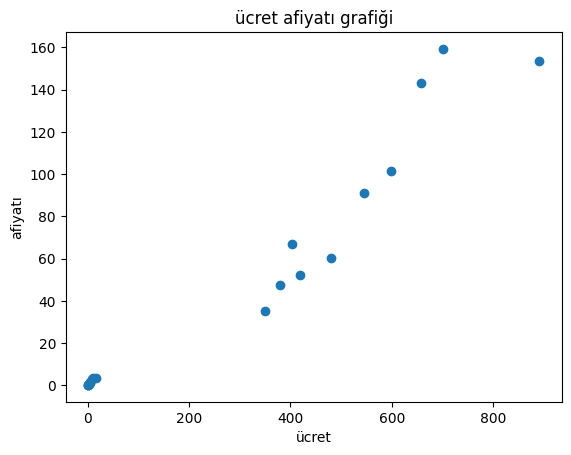

In [30]:
import matplotlib.pyplot as plt

plt.scatter(tugcenin_verisi['ücret'], tugcenin_verisi['afiyatı'])
plt.xlabel('ücret')
plt.ylabel('afiyatı')
plt.title('ücret afiyatı grafiği')
plt.show()

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(tugcenin_verisi[['ücret', 'afiyatı']])
tugcenin_verisi['küme'] = kmeans.predict(tugcenin_verisi[['ücret', 'afiyatı']])
tugcenin_verisi

,ücret,asayısı,afiyatı,küme
0,350.000,10.0,35.000000,2
1,380.000,8.0,47.500000,2
2,403.000,6.0,67.166667,2
3,419.000,8.0,52.375000,2
4,481.000,8.0,60.125000,2
5,546.000,6.0,91.000000,1
6,599.000,5.9,101.525424,1
7,658.000,4.6,143.043478,4
8,701.000,4.4,159.318182,4
9,891.000,5.8,153.620690,3


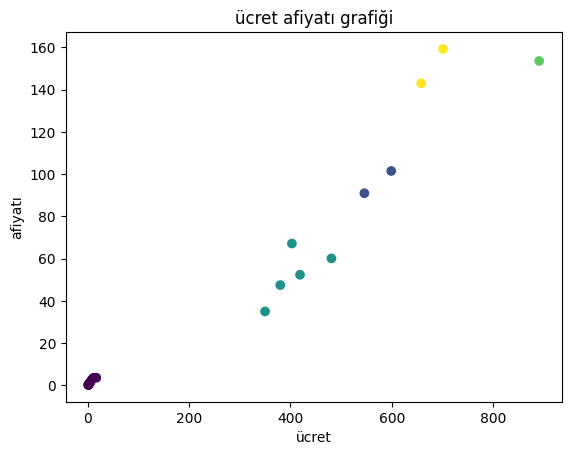

In [35]:
plt.scatter(tugcenin_verisi['ücret'], tugcenin_verisi['afiyatı'], c=tugcenin_verisi['küme'])
plt.xlabel('ücret')
plt.ylabel('afiyatı')
plt.title('ücret afiyatı grafiği')
plt.show()

In [36]:
td_verisi = pd.read_csv("müşteri_bilgileri.csv")
td_verisi

,yaş,gelir,harcama
0,19,15000,39
1,21,15000,81
2,20,16000,6
3,23,16000,77
4,31,17000,40
5,22,17000,76
6,35,18000,6
7,23,18000,94
8,64,19000,3
9,30,19000,72


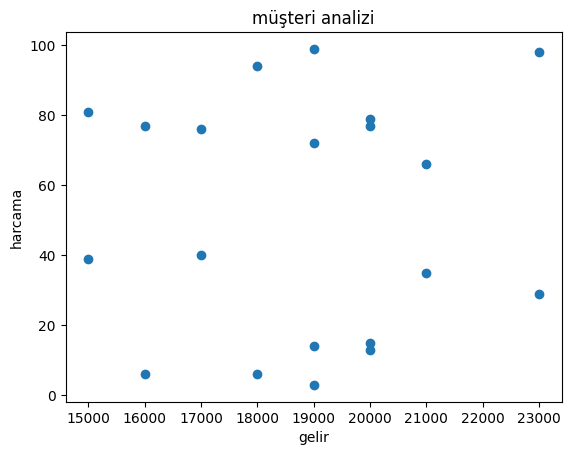

In [37]:
import matplotlib.pyplot as plt
plt.scatter(td_verisi['gelir'], td_verisi['harcama'])
plt.xlabel('gelir')
plt.ylabel('harcama')
plt.title ('müşteri analizi')
plt.show()



In [38]:
a = 5
b = 12

def gelir_tahmini(harcama):
    return a * harcama + b

In [39]:
bir_gelir_icin_harcama = gelir_tahmini(1)
print(bir_gelir_icin_harcama)

17


In [40]:
# sci-kit learn kütüphanesini import edelim
# linear regression modelini oluşturalım

from sklearn.linear_model import LinearRegression

model = LinearRegression()
# formül y = ax + b
# a = 4, b = 5

In [41]:
# rasgele sayılar ile modeli eğitelim
model.fit([[1], [2], [3], [4]], [5, 9, 13, 17])

LinearRegression()

In [42]:
# modelimizi eğitelim
# x değişkenimiz gelir, y değişkenimiz harcama

model.fit(td_verisi[["gelir"]], td_verisi["harcama"])

LinearRegression()

In [49]:
tahmin_edilen_degerler = model.predict(td_verisi[["gelir"]])
tahmin_edilen_degerler

array([49.59496124, 49.59496124, 49.95155039, 49.95155039, 50.30813953,
       50.30813953, 50.66472868, 50.66472868, 51.02131783, 51.02131783,
       51.02131783, 51.02131783, 51.37790698, 51.37790698, 51.37790698,
       51.37790698, 51.73449612, 51.73449612, 52.44767442, 52.44767442])

In [50]:
# modelimizin parametrelerini görelim
model.coef_, model.intercept_

(array([0.00035659]), np.float64(44.246124031007746))

In [51]:
# predict 1
model.predict([[1]])

c:\Users\Tuğçe\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([44.24648062])

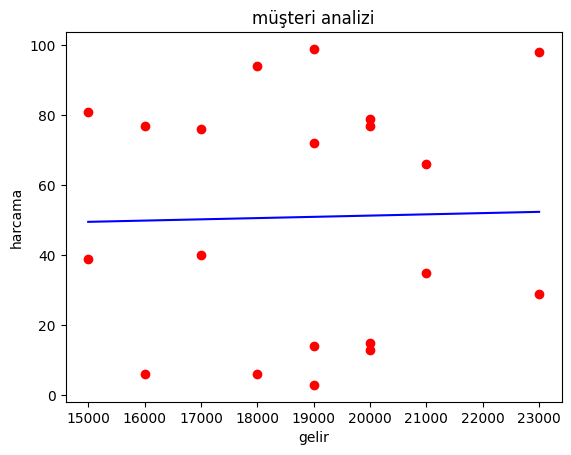

In [55]:
# şimdi grafiğe çizelim
plt.scatter(td_verisi ["gelir"], td_verisi ["harcama"], color="red")
plt.plot(td_verisi["gelir"], tahmin_edilen_degerler, color="blue")
plt.xlabel("gelir")
plt.ylabel("harcama")
plt.title("müşteri analizi")
plt.show()

In [56]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(td_verisi[['gelir', 'harcama']])
td_verisi['küme'] = kmeans.predict(td_verisi[['gelir', 'harcama']])
td_verisi


,yaş,gelir,harcama,küme
0,19,15000,39,2
1,21,15000,81,2
2,20,16000,6,2
3,23,16000,77,4
4,31,17000,40,4
5,22,17000,76,4
6,35,18000,6,0
7,23,18000,94,0
8,64,19000,3,0
9,30,19000,72,0


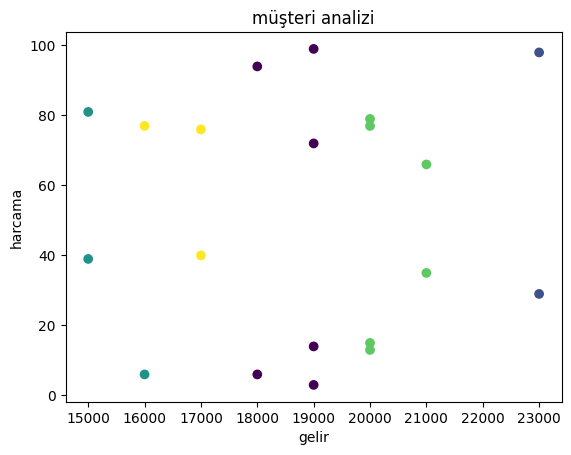

In [57]:
plt.scatter(td_verisi['gelir'], td_verisi['harcama'], c=td_verisi['küme'])
plt.xlabel('gelir')
plt.ylabel('harcama')
plt.title('müşteri analizi')
plt.show()

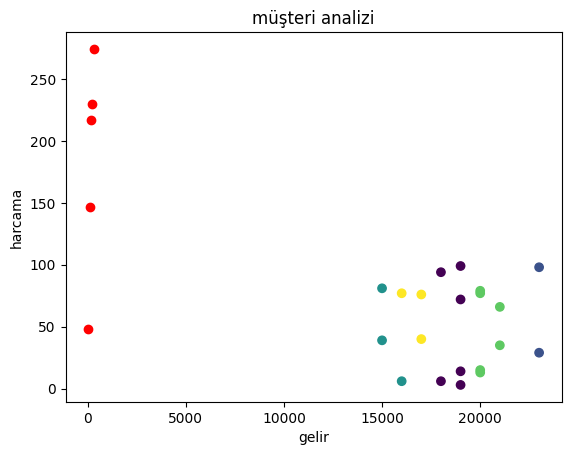

In [58]:
# draw centroids
plt.scatter(td_verisi['gelir'], td_verisi['harcama'], c=td_verisi['küme'])
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='red')
plt.xlabel('gelir')
plt.ylabel('harcama')
plt.title('müşteri analizi')
plt.show()

In [46]:
import pandas as pd

In [59]:
td_verisi1 = pd.read_csv("hastalık_oranı.csv")
td_verisi1

,toplam,psayı,cyüzdesi
0,2418,8,20.5
1,2648,4,16.7
2,2804,5,21.7
3,2960,3,12.0
4,3115,7,18.9
5,3282,10,24.4
6,3475,15,31.3
7,4508,8,33.3
8,4585,5,35.7
9,4655,5,31.3


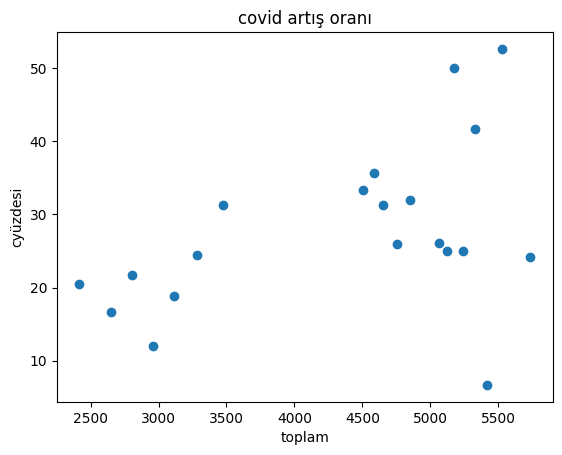

In [60]:
import matplotlib.pyplot as plt
plt.scatter(td_verisi1['toplam'], td_verisi1['cyüzdesi'])
plt.xlabel('toplam')
plt.ylabel('cyüzdesi')
plt.title ('covid artış oranı')
plt.show()


In [61]:
a = 5
b = 12

def toplam_tahmini(cyüzdesi):
    return a * cyüzdesi + b

In [62]:
bir_toplam_icin_cyüzdesi = toplam_tahmini(1)
print(bir_toplam_icin_cyüzdesi)

17


In [63]:
# sci-kit learn kütüphanesini import edelim
# linear regression modelini oluşturalım

from sklearn.linear_model import LinearRegression

model = LinearRegression()
# formül y = ax + b
# a = 4, b = 5

In [64]:
bir_toplam_icin_cyüzdesi = toplam_tahmini(1)
print(bir_toplam_icin_cyüzdesi)

17


In [66]:
# rasgele sayılar ile modeli eğitelim
model.fit([[1], [2], [3], [4]], [5, 9, 13, 17])

LinearRegression()

In [67]:
# modelimizi eğitelim
# x değişkenimiz toplam, y değişkenimiz cyüzdesi

model.fit(td_verisi1[["toplam"]], td_verisi1["cyüzdesi"])

LinearRegression()

In [68]:
tahmin_edilen_degerler = model.predict(td_verisi1[["toplam"]])
tahmin_edilen_degerler

array([18.67511526, 19.76530538, 20.50473868, 21.24417198, 21.97886532,
       22.77043814, 23.68524985, 28.58162546, 28.94660215, 29.27839914,
       29.74291493, 30.19321085, 31.20756166, 31.47773921, 31.72895693,
       32.06075392, 32.45891031, 32.8902464 , 33.40690172, 34.4022927 ])

In [69]:
# modelimizin parametrelerini görelim
model.coef_, model.intercept_

(array([0.00473996]), np.float64(7.21389916228938))

In [70]:
# predict 1
model.predict([[1]])

c:\Users\Tuğçe\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.21863912])

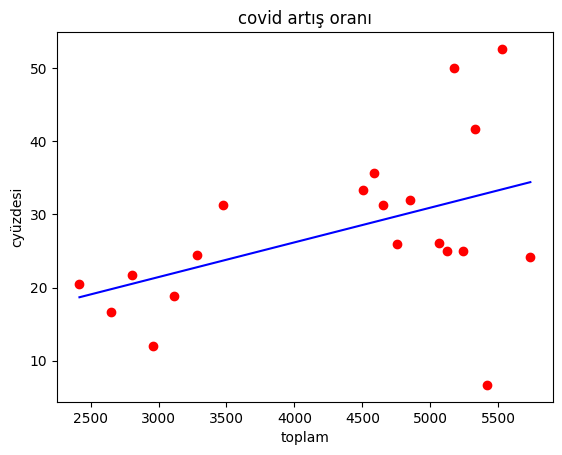

In [73]:
# şimdi grafiğe çizelim
plt.scatter(td_verisi1["toplam"], td_verisi1["cyüzdesi"], color="red")
plt.plot(td_verisi1["toplam"], tahmin_edilen_degerler, color="blue")
plt.xlabel("toplam")
plt.ylabel("cyüzdesi")
plt.title("covid artış oranı")
plt.show()

In [74]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(td_verisi[['gelir', 'harcama']])
td_verisi['küme'] = kmeans.predict(td_verisi[['gelir', 'harcama']])
td_verisi


,yaş,gelir,harcama,küme
0,19,15000,39,1
1,21,15000,81,1
2,20,16000,6,1
3,23,16000,77,1
4,31,17000,40,1
5,22,17000,76,1
6,35,18000,6,0
7,23,18000,94,0
8,64,19000,3,0
9,30,19000,72,0


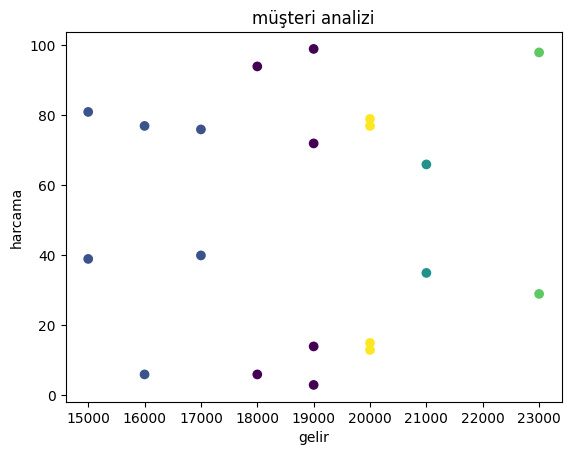

In [75]:
plt.scatter(td_verisi['gelir'], td_verisi['harcama'], c=td_verisi['küme'])
plt.xlabel('gelir')
plt.ylabel('harcama')
plt.title('müşteri analizi')
plt.show()

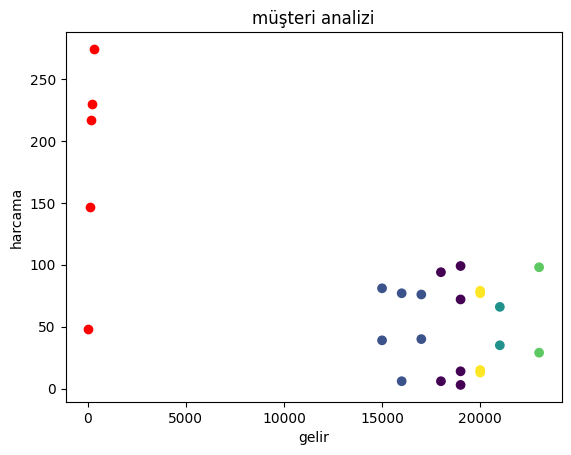

In [76]:
# draw centroids
plt.scatter(td_verisi['gelir'], td_verisi['harcama'], c=td_verisi['küme'])
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='red')
plt.xlabel('gelir')
plt.ylabel('harcama')
plt.title('müşteri analizi')
plt.show()